## Importamos librerías y configuraciones

In [61]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../')

from config import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


---
---
## Importamos los datos

In [62]:
df = pd.read_pickle('../../datos/tratados/df_employee_data.pkl').reset_index(drop=True)
df.sample()

,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Manager_opinion_JobInvolvement,Manager_opinion_PerformanceRating
2200,Very High,Very High,Good,41,False,Travel_Frequently,Research & Development,1,Bachelor,Life Sciences,Male,4,Sales Executive,Divorced,191410,3.00,12,1,12.00,2,6,3,3,High,Excellent


---
---
## Exploracion Datos

In [63]:
sup_prep.exploracion_datos(df, info=False)

El número de filas es 4410 y el número de columnas es 25

----------

En este conjunto de datos tenemos 2837 valores duplicados

----------

Las principales estadísticas de las variables númericas son:


,count,mean,std,min,25%,50%,75%,max
Age,4410.00,36.92,9.13,18.00,30.00,36.00,43.00,60.00
DistanceFromHome,4410.00,9.19,8.11,1.00,2.00,7.00,14.00,29.00
JobLevel,4410.00,2.06,1.11,1.00,1.00,2.00,3.00,5.00
MonthlyIncome,4410.00,65029.31,47068.89,10090.00,29110.00,49190.00,83800.00,199990.00
NumCompaniesWorked,4391.00,2.69,2.50,0.00,1.00,2.00,4.00,9.00
PercentSalaryHike,4410.00,15.21,3.66,11.00,12.00,14.00,18.00,25.00
StockOptionLevel,4410.00,0.79,0.85,0.00,0.00,1.00,1.00,3.00
TotalWorkingYears,4401.00,11.28,7.78,0.00,6.00,10.00,15.00,40.00
TrainingTimesLastYear,4410.00,2.80,1.29,0.00,2.00,3.00,3.00,6.00
YearsAtCompany,4410.00,7.01,6.13,0.00,3.00,5.00,9.00,40.00



----------

Las principales estadísticas de las variables categóricas son:


,count,unique,top,freq
EnvironmentSatisfaction,4385,4,High,1350
JobSatisfaction,4390,4,Very High,1367
WorkLifeBalance,4372,4,Better,2660
BusinessTravel,4410,3,Travel_Rarely,3129
Department,4410,3,Research & Development,2883
Education,4410,5,Bachelor,1716
EducationField,4410,6,Life Sciences,1818
Gender,4410,2,Male,2646
JobRole,4410,9,Sales Executive,978
MaritalStatus,4410,3,Married,2019



----------

Los columnas con valores nulos y sus porcentajes son: 


,%_nulos
WorkLifeBalance,0.86
EnvironmentSatisfaction,0.57
JobSatisfaction,0.45
NumCompaniesWorked,0.43
TotalWorkingYears,0.20


#### Vemos que **tenemos 2837 valores duplicados**. Por lo que vamos a eliminarlos y volver a ver nuestras estadísticas.

In [64]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

sup_prep.exploracion_datos(df, info=False)

El número de filas es 1573 y el número de columnas es 25

----------

En este conjunto de datos tenemos 0 valores duplicados

----------

Las principales estadísticas de las variables númericas son:


,count,mean,std,min,25%,50%,75%,max
Age,1573.00,36.90,9.11,18.00,30.00,36.00,43.00,60.00
DistanceFromHome,1573.00,9.16,8.12,1.00,2.00,7.00,14.00,29.00
JobLevel,1573.00,2.06,1.11,1.00,1.00,2.00,3.00,5.00
MonthlyIncome,1573.00,64979.46,47121.74,10090.00,28990.00,49000.00,83800.00,199990.00
NumCompaniesWorked,1554.00,2.70,2.51,0.00,1.00,2.00,4.00,9.00
PercentSalaryHike,1573.00,15.20,3.65,11.00,12.00,14.00,18.00,25.00
StockOptionLevel,1573.00,0.79,0.85,0.00,0.00,1.00,1.00,3.00
TotalWorkingYears,1564.00,11.25,7.75,0.00,6.00,10.00,15.00,40.00
TrainingTimesLastYear,1573.00,2.81,1.29,0.00,2.00,3.00,3.00,6.00
YearsAtCompany,1573.00,6.97,6.07,0.00,3.00,5.00,9.00,40.00



----------

Las principales estadísticas de las variables categóricas son:


,count,unique,top,freq
EnvironmentSatisfaction,1550,4,High,482
JobSatisfaction,1555,4,Very High,490
WorkLifeBalance,1538,4,Better,942
BusinessTravel,1573,3,Travel_Rarely,1117
Department,1573,3,Research & Development,1030
Education,1573,5,Bachelor,615
EducationField,1573,6,Life Sciences,655
Gender,1573,2,Male,953
JobRole,1573,9,Sales Executive,348
MaritalStatus,1573,3,Married,720



----------

Los columnas con valores nulos y sus porcentajes son: 


,%_nulos
WorkLifeBalance,2.23
EnvironmentSatisfaction,1.46
NumCompaniesWorked,1.21
JobSatisfaction,1.14
TotalWorkingYears,0.57


In [65]:
df.sample()

,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Manager_opinion_JobInvolvement,Manager_opinion_PerformanceRating
113,Very High,Very High,Better,29,False,Travel_Rarely,Research & Development,1,Bachelor,Life Sciences,Female,2,Research Director,Single,66670,9.00,12,1,6.00,6,3,1,2,Very High,Excellent


#### como tenemos pocos nulos, los vamos a rellenar con el valor 'unknown' para las variables categoricas y por la mediana para las numericas

In [66]:
df['WorkLifeBalance'].fillna('unknown', inplace=True)
df['EnvironmentSatisfaction'].fillna('unknown', inplace=True)
df['NumCompaniesWorked'].fillna(2.00, inplace=True)
df['JobSatisfaction'].fillna('unknown', inplace=True)
df['TotalWorkingYears'].fillna(10.00, inplace=True)

df.isna().sum()

EnvironmentSatisfaction              0
JobSatisfaction                      0
WorkLifeBalance                      0
Age                                  0
Attrition                            0
BusinessTravel                       0
Department                           0
DistanceFromHome                     0
Education                            0
EducationField                       0
Gender                               0
JobLevel                             0
JobRole                              0
MaritalStatus                        0
MonthlyIncome                        0
NumCompaniesWorked                   0
PercentSalaryHike                    0
StockOptionLevel                     0
TotalWorkingYears                    0
TrainingTimesLastYear                0
YearsAtCompany                       0
YearsSinceLastPromotion              0
YearsWithCurrManager                 0
Manager_opinion_JobInvolvement       0
Manager_opinion_PerformanceRating    0
dtype: int64

---
---
## Gestion OutLayers

In [67]:
vis = sup_prep.Visualizador(df)

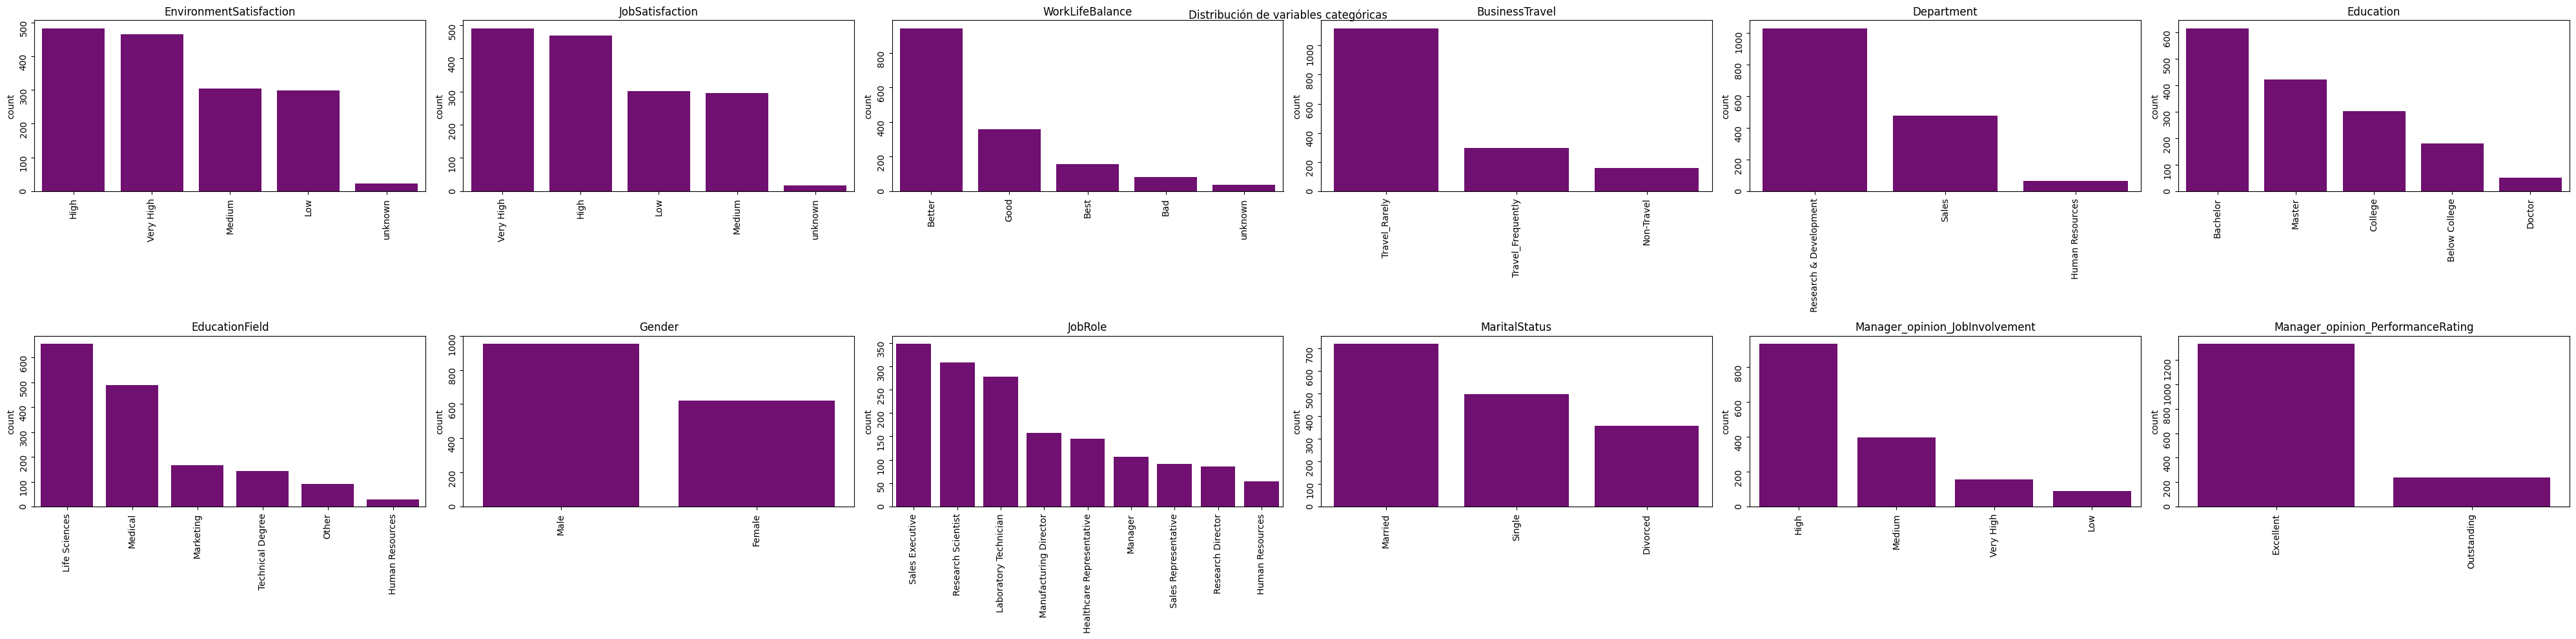

In [68]:
vis.plot_categoricas(color='purple')

12it [00:00, 15.86it/s]


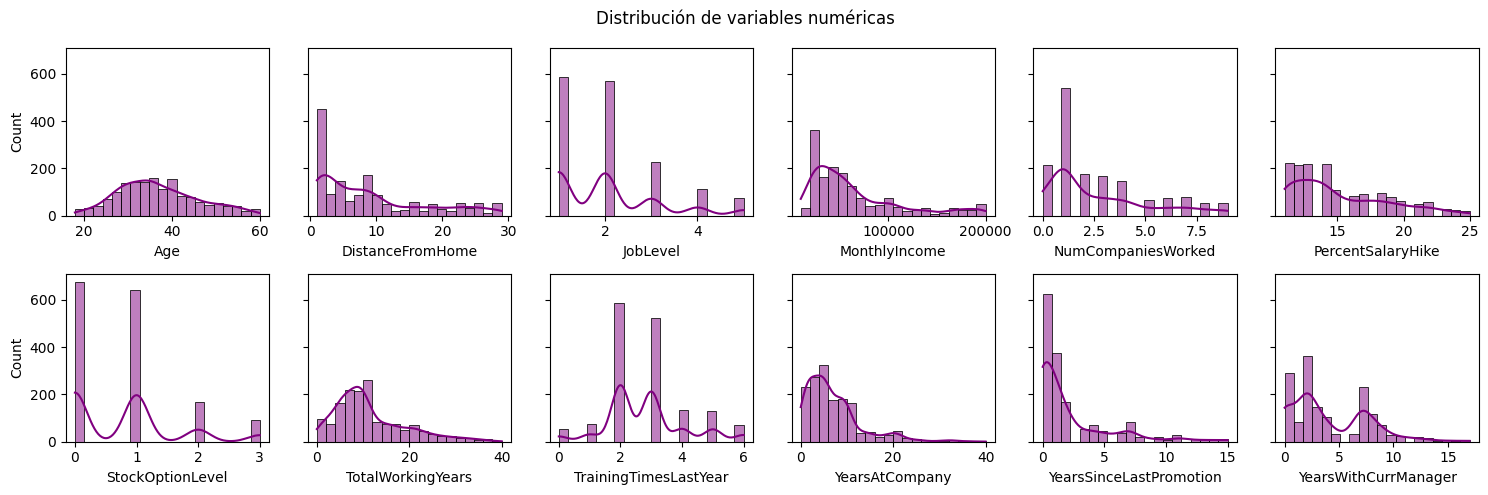

In [69]:
vis.plot_numericas(color='purple', kde=True)

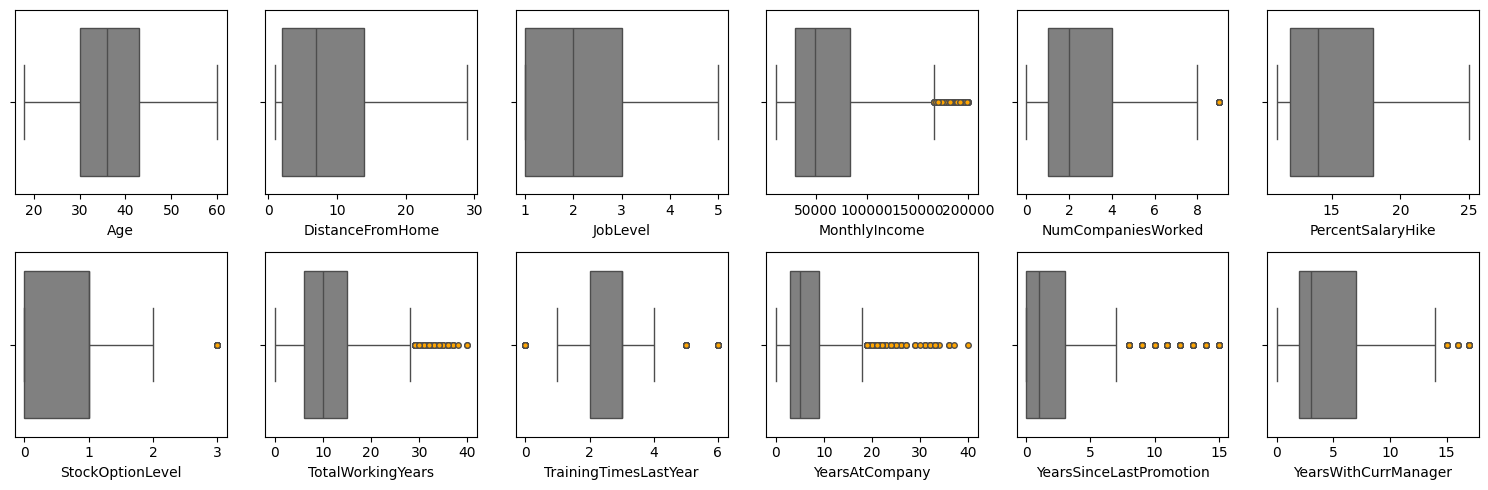

In [70]:
vis.deteccion_outliers()

## Uso de metodos para detectar outlayers multivariados.

In [71]:
df.sample()

,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Manager_opinion_JobInvolvement,Manager_opinion_PerformanceRating
1049,High,Low,Better,28,False,Travel_Rarely,Sales,1,College,Life Sciences,Male,3,Manager,Married,44770,1.00,15,0,3.00,6,3,1,2,High,Excellent


In [72]:
df.shape

(1573, 25)

In [73]:
sup_out.describe_outlayers(df)

,columna,n_outlayers,limite_inf,limite_sup,%_outlayers
8,TrainingTimesLastYear,254,0.50,4.50,16.15
3,MonthlyIncome,122,-53225.00,166015.00,7.76
10,YearsSinceLastPromotion,112,-4.50,7.50,7.12
9,YearsAtCompany,110,-6.00,18.00,6.99
6,StockOptionLevel,90,-1.50,2.50,5.72
7,TotalWorkingYears,65,-7.50,28.50,4.13
4,NumCompaniesWorked,54,-3.50,8.50,3.43
11,YearsWithCurrManager,16,-5.50,14.50,1.02
0,Age,0,10.50,62.50,0.00
1,DistanceFromHome,0,-16.00,32.00,0.00


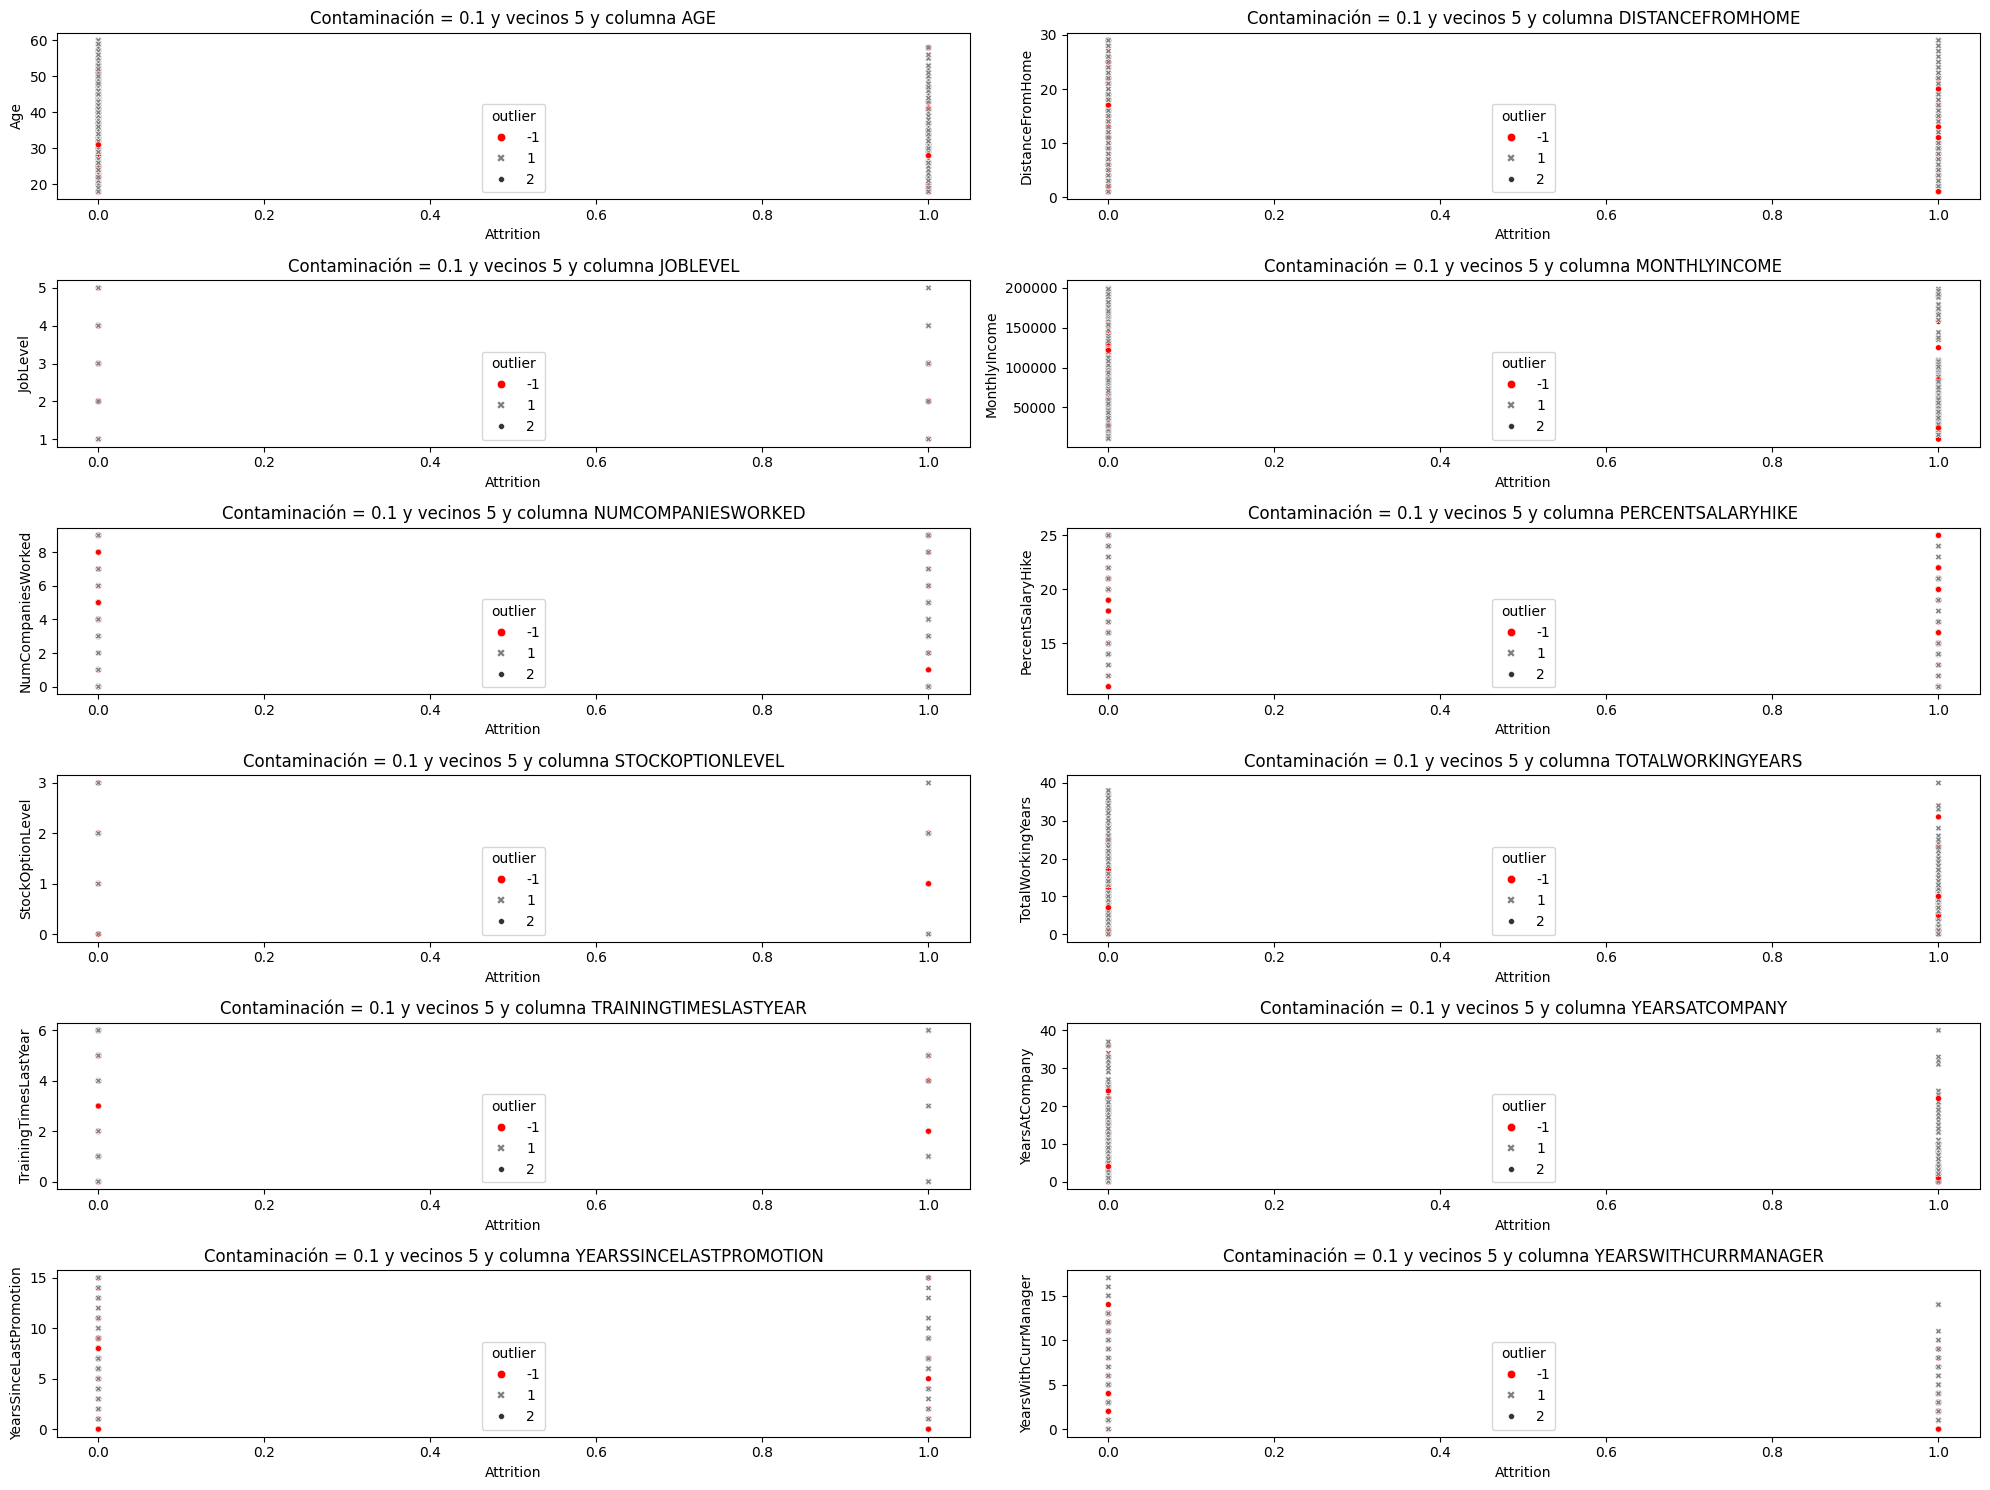

In [74]:
gestion_multi = sup_out.GestionOutliersMultivariados(df, contaminacion=[0.1])
gestion_multi.explorar_outliers_lof("Attrition",indice_contaminacion=[0.1], vecinos=[5])

In [75]:
df_outlayers = gestion_multi.detectar_outliers_lof(n_neighbors=10, contaminacion=0.05)
df_outlayers.head()

,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Manager_opinion_JobInvolvement,Manager_opinion_PerformanceRating,outlier
0,High,Very High,Good,51,False,Travel_Rarely,Sales,6,College,Life Sciences,Female,1,Healthcare Representative,Married,131160,1.00,11,0,1.00,6,1,0,0,High,Excellent,1
1,High,Medium,Best,31,True,Travel_Frequently,Research & Development,10,Below College,Life Sciences,Female,1,Research Scientist,Single,41890,0.00,23,1,6.00,3,5,1,4,Medium,Outstanding,1
2,Medium,Medium,Bad,32,False,Travel_Frequently,Research & Development,17,Master,Other,Male,4,Sales Executive,Married,193280,1.00,15,3,5.00,2,5,0,3,High,Excellent,1
3,Very High,Very High,Better,38,False,Non-Travel,Research & Development,2,Doctor,Life Sciences,Male,3,Human Resources,Married,83210,3.00,11,3,13.00,5,8,7,5,Medium,Excellent,1
4,Very High,Low,Better,32,False,Travel_Rarely,Research & Development,10,Below College,Medical,Male,1,Sales Executive,Single,23420,4.00,12,2,9.00,2,6,0,4,High,Excellent,1


In [76]:
df_outlayers_true = df_outlayers[df_outlayers['outlier'] == -1]
df_outlayers_true.shape

(79, 26)

In [77]:
df.drop(index=df_outlayers_true.index, inplace=True)

In [78]:
df.shape

(1494, 25)

---
---

## Salvamos los datos

Una vez tratados los nulos y los outlaiers, pasamos a esacalar y encodear nuestros datos en el notobook ```3_escalado_y_encoding.ipynb```.

In [79]:
df.to_pickle('../../datos/tratados/nonuls_nooutliers_df_employee_data.pkl')